# Dataset introduction

The dataset chosen for this project is a celeberity dataset. Through this dataset we will be trying to generate faces and with certain attributes like smiling, young, male or female and so on.

We have 4 different files as described below:

1. **img_align_celeba.zip**: All the face images
2. **list_eval_partition.csv**: Recommended partitioning of images into training, validation, testing sets. Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing
3. **list_bbox_celeba.csv**: Bounding box information for each image. "x_1" and "y_1" represent the upper left point coordinate of bounding box. "width" and "height" represent the width and height of bounding box
4. **list_landmarks_align_celeba.csv**: Image landmarks and their respective coordinates. There are 5 landmarks: left eye, right eye, nose, left mouth, right mouth
5. **list_attr_celeba.csv**: Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative

In [1]:
#Importing zipfile for unzipping the dataset file
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.preprocessing.image import load_img
from PIL import Image
from google.colab import drive

In [2]:
# Mounting Google Drive
drive.mount('/content/drive')

# drive.flush_and_unmount()

Mounted at /content/drive


In [3]:
# Navigating to the directory containing the zip file
%cd /content/drive/MyDrive/

# Unzipping the file
!unzip archive.zip


Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [5]:
df_list_attr = pd.read_csv('list_attr_celeba.csv')
df_list_attr.set_index('image_id', inplace=True)
df_list_attr.replace(to_replace=-1, value=0, inplace=True)  # replacing all the attributes of -1 by 0
df_list_attr.shape

(202599, 40)

In [6]:
#Displaying different attributes of the images. In total, there are 40 attributes for each image.
df_list_attr

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
202596.jpg,0,0,0,0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
202597.jpg,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


The image below plotted shows different details, and it appears based on whether the details have a '1', meaning 'Yes'. This makes it easier to understand and learn about the different details in the file.

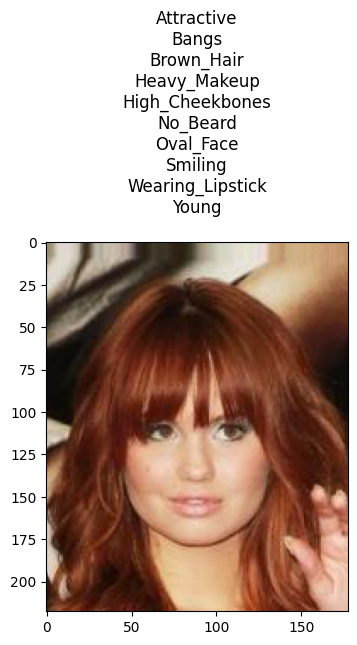

In [7]:
label = ''
img = load_img('img_align_celeba/img_align_celeba/000170.jpg')
row_index = df_list_attr.index.get_loc('000170.jpg')

for col in df_list_attr.columns:
    if df_list_attr.loc['000170.jpg', col] == 1:
        label += col + '\n'

plt.imshow(img)
plt.title(label)
plt.show()

In [8]:
# Printing the shape of the image used in previous code cell
img_array = np.array(img)
print("Image shape:", img_array.shape)

Image shape: (218, 178, 3)


The below code is of the file list_eval_partition.csv. This file contains the partition of the data in training, validation and testing dataset.

In [9]:
#Overview of list_eval_partition.csv
#Partition columns is defined as follows: 0 for training, 1 for validation and 2 for testing dataset
df_partition_list = pd.read_csv('list_eval_partition.csv')
df_partition_list.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
